<a href="https://colab.research.google.com/github/2series/100_Days_of_ML_Code/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem Statement***

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

# Hence, applying time series forecasting of passengers for the coming 7 months!

**Hypothesis Generation**

Hypothesis generation helps point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

1. There will be an increase in the traffic as the years pass by.
     Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
2. The traffic will be high from May to October.
     Explanation - Tourist visits generally increases during this time perion.
3. Traffic on weekdays will be more as compared to weekends/holidays.
     Explanation - People will go to office on weekdays and hence the traffic will be more
4. Traffic during the peak hours will be high.
     Explanation - People will travel to work, college.


In [0]:
import pandas as pd                                   # For reading datasets  
import numpy as np                                    # For mathematical calculations
import matplotlib.pyplot as plt                       # For plotting graphs
from datetime import datetime                         # To access datetime
from pandas import Series                             # To work on series
%matplotlib inline
import warnings                                       # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install analytics

pandas 0.22.0 has requirement python-dateutil>=2, but you'll have python-dateutil 1.5 which is incompatible.
matplotlib 2.1.2 has requirement python-dateutil>=2.1, but you'll have python-dateutil 1.5 which is incompatible.
jupyter-client 5.2.3 has requirement python-dateutil>=2.1, but you'll have python-dateutil 1.5 which is incompatible.
  Found existing installation: python-dateutil 2.7.5
    Uninstalling python-dateutil-2.7.5:
      Successfully uninstalled python-dateutil-2.7.5


In [3]:
from google.colab import files
files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ (1).csv
Saving Train_SU63ISt.csv to Train_SU63ISt (1).csv


{'Test_0qrQsBZ.csv': b'ID,Datetime\r\n18288,26-09-2014 00:00\r\n18289,26-09-2014 01:00\r\n18290,26-09-2014 02:00\r\n18291,26-09-2014 03:00\r\n18292,26-09-2014 04:00\r\n18293,26-09-2014 05:00\r\n18294,26-09-2014 06:00\r\n18295,26-09-2014 07:00\r\n18296,26-09-2014 08:00\r\n18297,26-09-2014 09:00\r\n18298,26-09-2014 10:00\r\n18299,26-09-2014 11:00\r\n18300,26-09-2014 12:00\r\n18301,26-09-2014 13:00\r\n18302,26-09-2014 14:00\r\n18303,26-09-2014 15:00\r\n18304,26-09-2014 16:00\r\n18305,26-09-2014 17:00\r\n18306,26-09-2014 18:00\r\n18307,26-09-2014 19:00\r\n18308,26-09-2014 20:00\r\n18309,26-09-2014 21:00\r\n18310,26-09-2014 22:00\r\n18311,26-09-2014 23:00\r\n18312,27-09-2014 00:00\r\n18313,27-09-2014 01:00\r\n18314,27-09-2014 02:00\r\n18315,27-09-2014 03:00\r\n18316,27-09-2014 04:00\r\n18317,27-09-2014 05:00\r\n18318,27-09-2014 06:00\r\n18319,27-09-2014 07:00\r\n18320,27-09-2014 08:00\r\n18321,27-09-2014 09:00\r\n18322,27-09-2014 10:00\r\n18323,27-09-2014 11:00\r\n18324,27-09-2014 12:00\r\n

In [0]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [0]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [7]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [8]:
train.shape, test.shape

((18288, 3), (5112, 2))

We have 18 288 different records for the Count of passengers in train set and 5 112 in test set.

# Feature Extraction

In [0]:
# Change Datetime feature i.e object to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [0]:
# Validate datetime
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [0]:
# Extract day of week from Datetime, then based on values we'll assign whether the day is a wkend OR not
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [0]:
# Assigning 1 if day of wk is wkend AND 0 if day of wk is not wkend
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

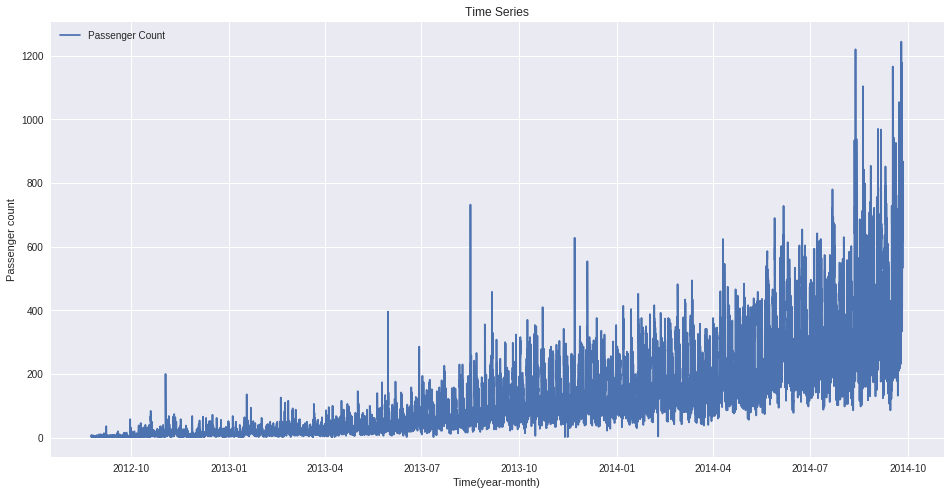

In [13]:
# Time series preview
train.index = train['Datetime']                      # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)                                # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

**Here we can observe that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high**

# Exploratory Analysis

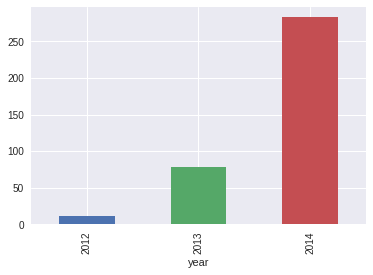

In [14]:
# Based on our 1st hypothesis, traffic will increase as years passby
train.groupby('year')['Count'].mean().plot.bar()

**We observe an exponential growth in the traffic with respect to years, which validates our hypothesis.**

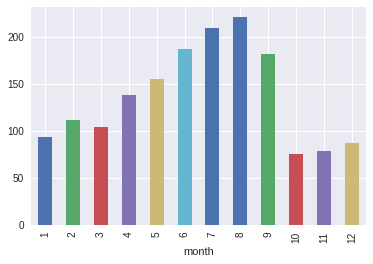

In [15]:
# 2nd hypothesis, increase in traffic from May to Oct
train.groupby('month')['Count'].mean().plot.bar()

**Here we observe a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.**

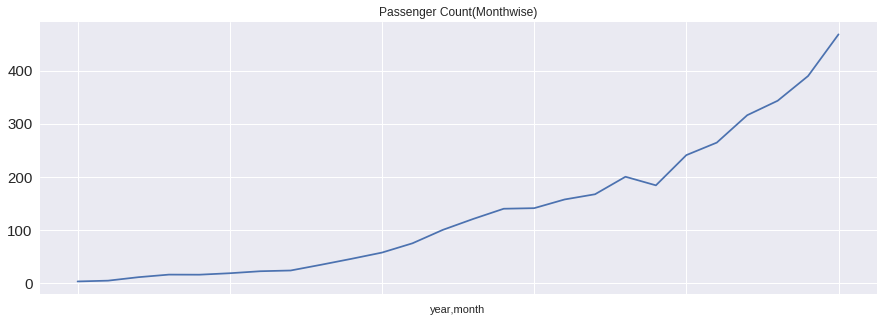

In [16]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=15)

*   We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.

*   Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

*   In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.



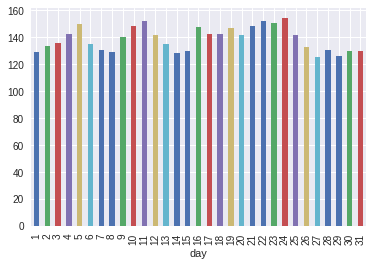

In [17]:
# Daily mean of passenger count
train.groupby('day')['Count'].mean().plot.bar()

**We are not getting much insights from day wise count of the passengers.**

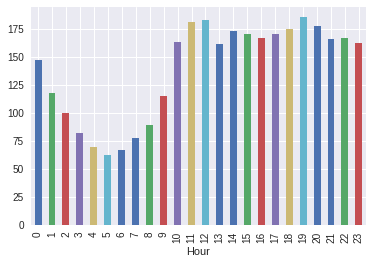

In [18]:
# 3rd hypothesis, traffic will increase during peak hours
train.groupby('Hour')['Count'].mean().plot.bar()

*   It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.

*   After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.


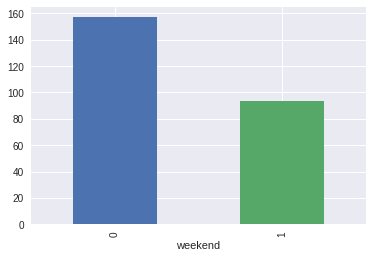

In [19]:
# 4th hypothesis, wkday traffic is greater than wkend traffic
train.groupby('weekend')['Count'].mean().plot.bar()

**It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.**

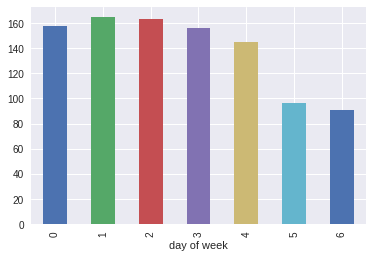

In [20]:
# Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby('day of week')['Count'].mean().plot.bar()

**From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.**

In [0]:
train = train.drop('ID',1)

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

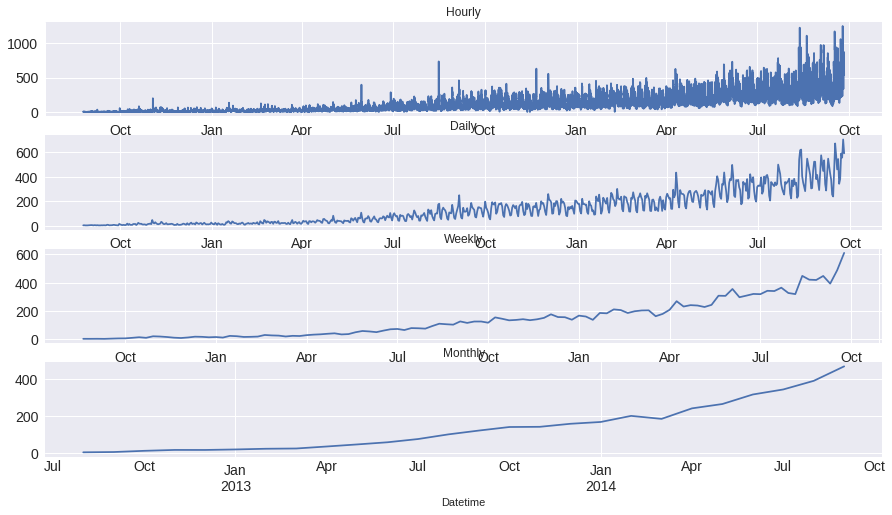

In [23]:
# time series preview
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

**We observe that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.**

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

# Splitting the data into training and validation part


Since I've validated the hypothesis, I'll go ahead and build models for time series forecasting


The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

In [0]:
# The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

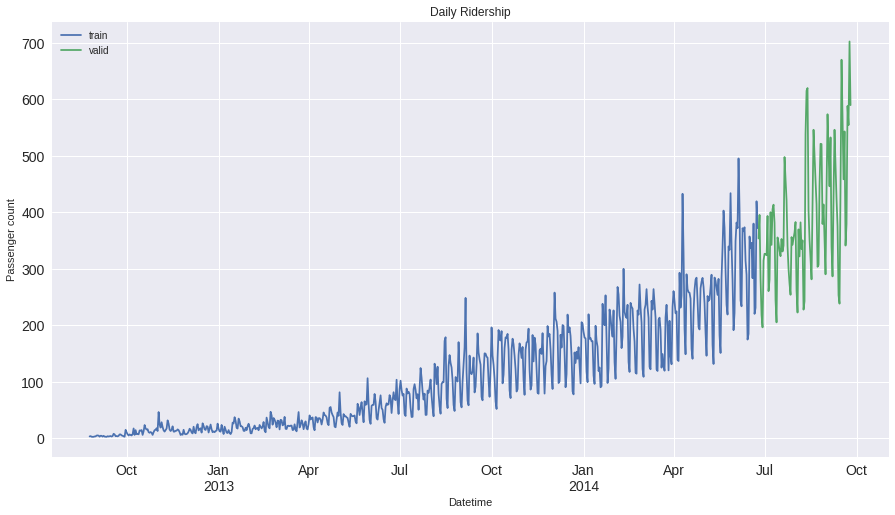

In [26]:
# Preview of how the train and validation part spilt
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

**Here the blue part represents the train data and the green part represents the validation data.**

# Modeling Techniques

1. Naive approach
2. Moving average
3. Simple exponential smoothing
4. Holt's linear trend model

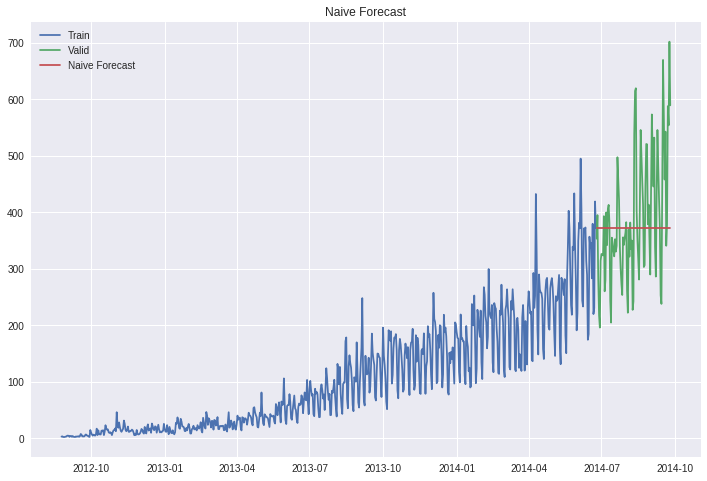

In [27]:
# Predictions using naive approach for validation set
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

*   We can calculate how accurate our predictions are using rmse(Root Mean Square Error).

*   rmse is the standard deviation of the residuals.

*   Residuals are a measure of how far from the regression line data points are.

In [28]:
# RMSE calc to check the accuracy of our model on validation set
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


**We observe that this method is not suitable for sets with high variability. We can reduce the rmse value by adopting different techniques**

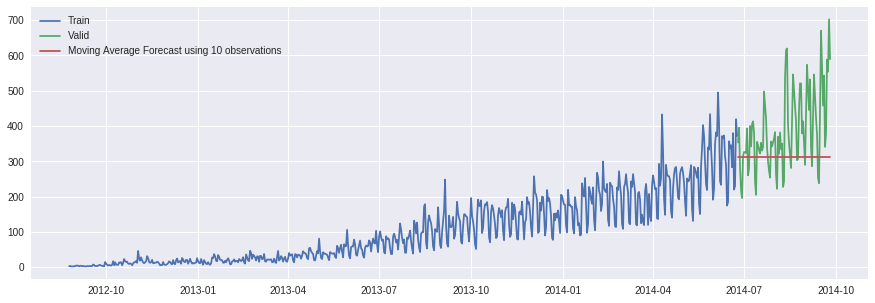

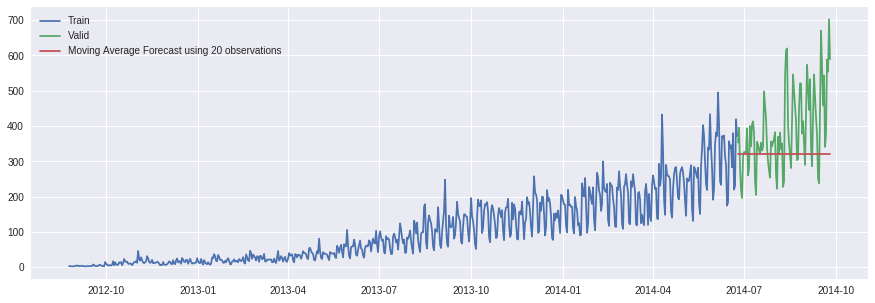

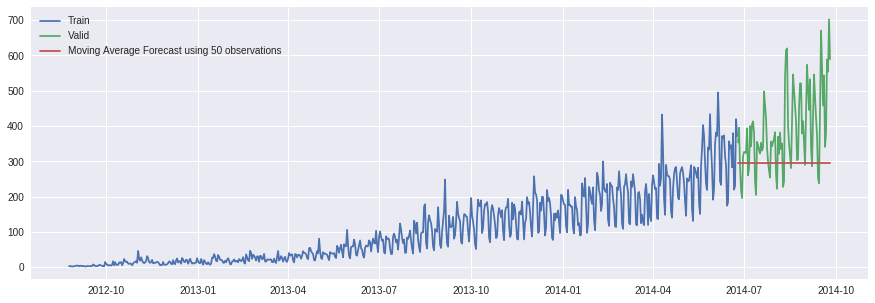

In [29]:
# Rolling mean for last 10, 20, 50 days with visual preview
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

**We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker as we increase the number of observations.**

In [30]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


In [31]:
!pip install statsmodels==0.9.0rc1

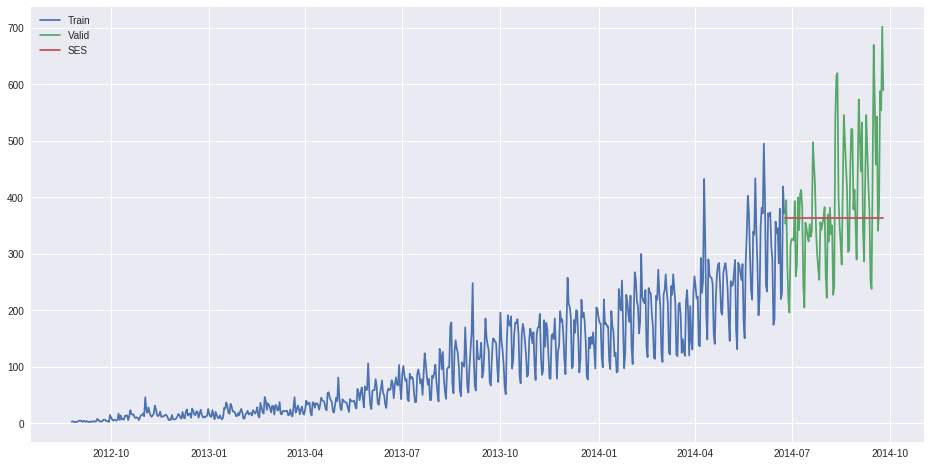

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


 **We can infer that the fit of the model has improved as the rmse value has reduced.**

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

**We can decompose the time series in four parts:**

  Observed, which is the original time series.

  Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
  
  Seasonal, which tells us about the seasonality in the time series.

  Residual, which is obtained by removing any trend or seasonality in the time series.


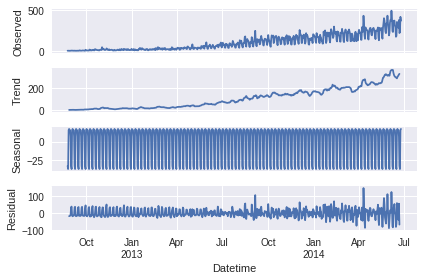

In [35]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

**An increasing trend can be seen in the dataset, so now we will make a model based on the trend.**

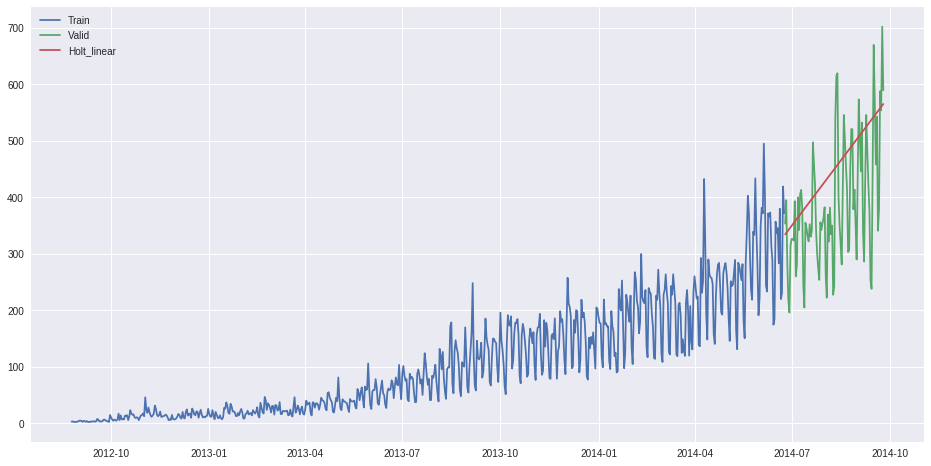

In [36]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

**We can see an inclined line here as the model has taken into consideration the trend of the time series.**

In [37]:
# rmse calc of the model
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


**We notice the rmse value has decreased.**

In [38]:
# Submission file
from google.colab import files
files.upload()

Saving Sample_Submission_QChS6c3.csv to Sample_Submission_QChS6c3.csv


{'Sample_Submission_QChS6c3.csv': b'ID,Count\r\n'}

In [0]:
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')

In [0]:
# Our prediction for the test set
predict = fit1.forecast(len(test))

In [0]:
# Saving our pred in test file in a new column
test['prediction'] = predict

In [0]:
# Calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [0]:
# Drop all other features from submission file and keep ID and Count
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

# Holt Winter's model on daily time series


Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

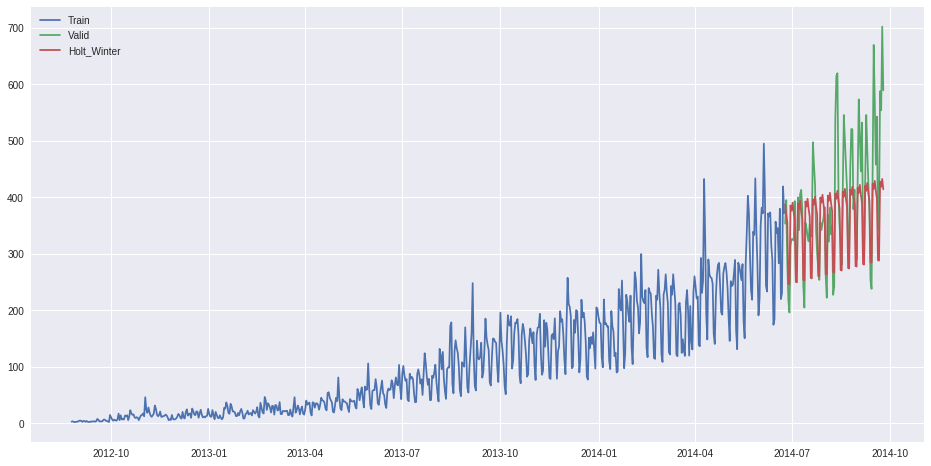

In [45]:
# Fit the model on training set and validate it using the validation set
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37900996094073


# **We can see that the rmse value has reduced a lot from this method. Let’s forecast the Counts for the entire length of the Test dataset.**

In [0]:
predict = fit1.forecast(len(test))

In [0]:
# Convert these daily passenger count into hourly passenger count
test['prediction'] = predict

In [0]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [0]:
# Drop all features other than ID and Count
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

In [0]:
# Function which we can use to calculate the results of Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = pd.rolling_std(timeseries, window=24)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [0]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

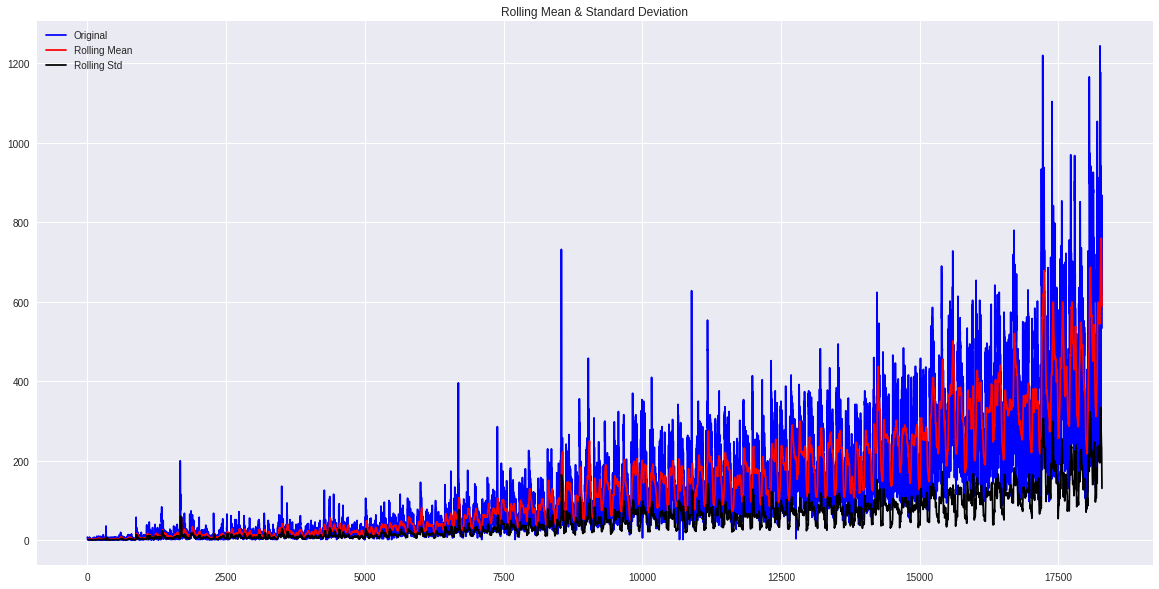

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [53]:
test_stationarity(train_original['Count'])

**The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.**

In [0]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

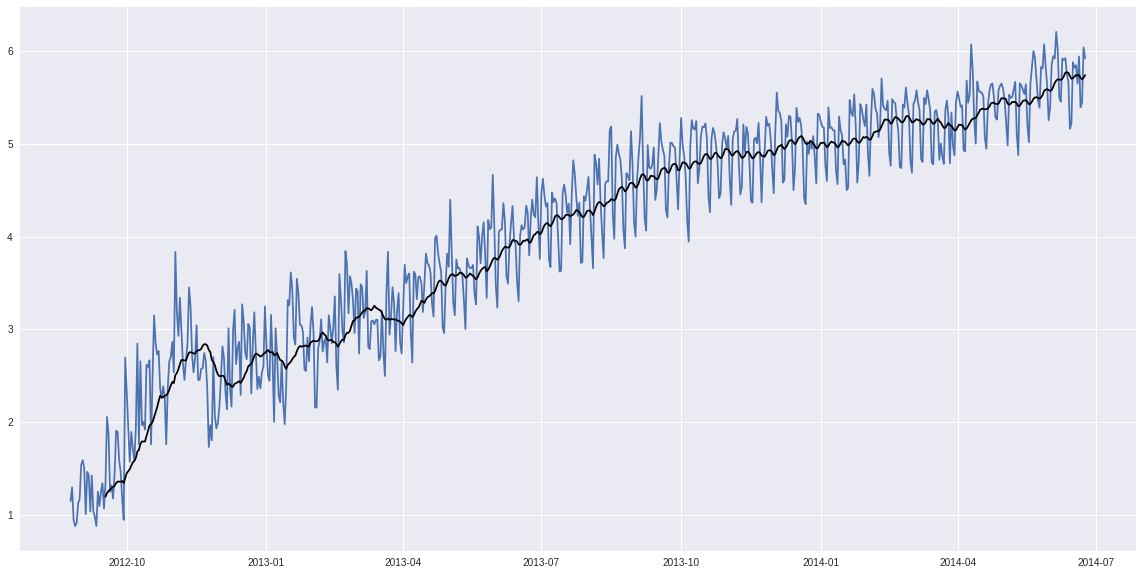

In [57]:
moving_avg = pd.rolling_mean(Train_log, 24)
plt.plot(Train_log)
plt.plot(moving_avg, color = 'black')
plt.show()

**So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.**

In [0]:
train_log_moving_avg_diff = Train_log - moving_avg

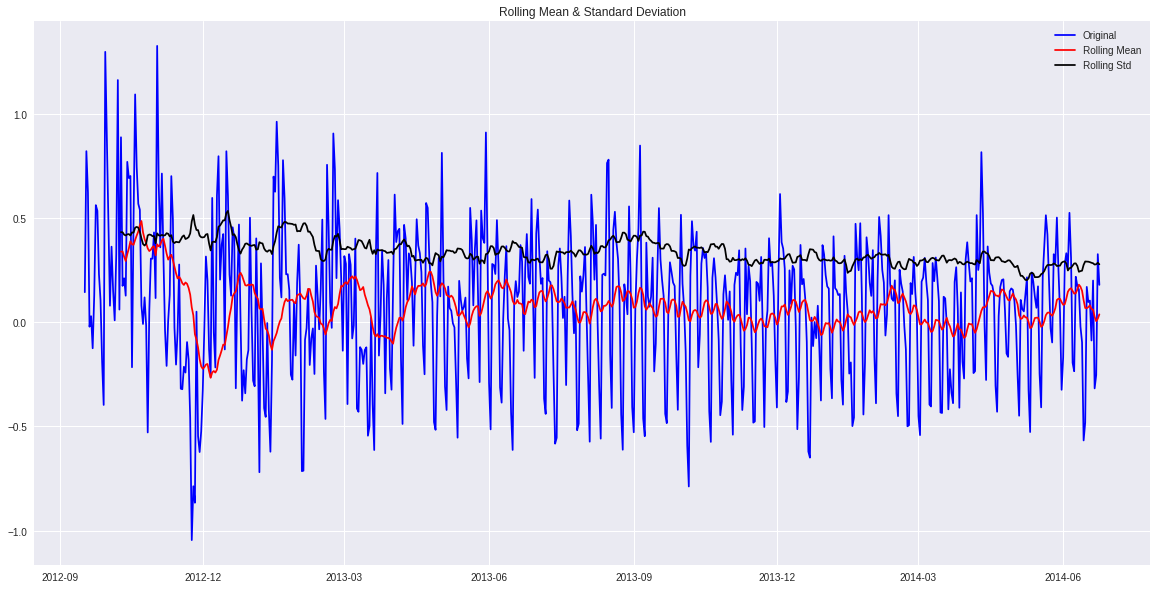

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [59]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

**We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.**

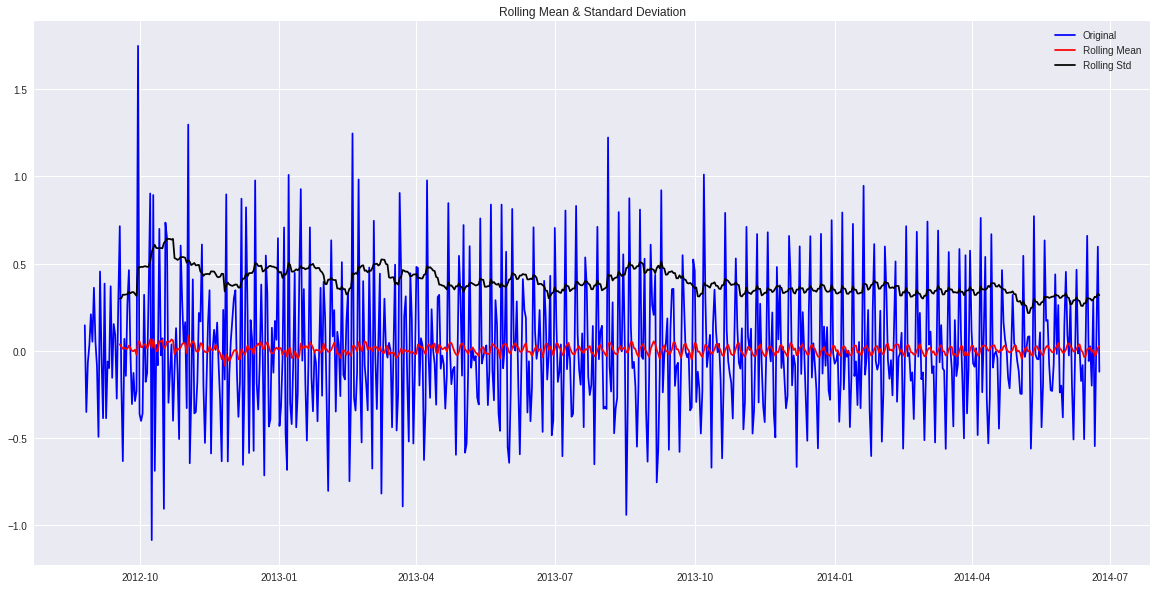

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [60]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

**Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.**

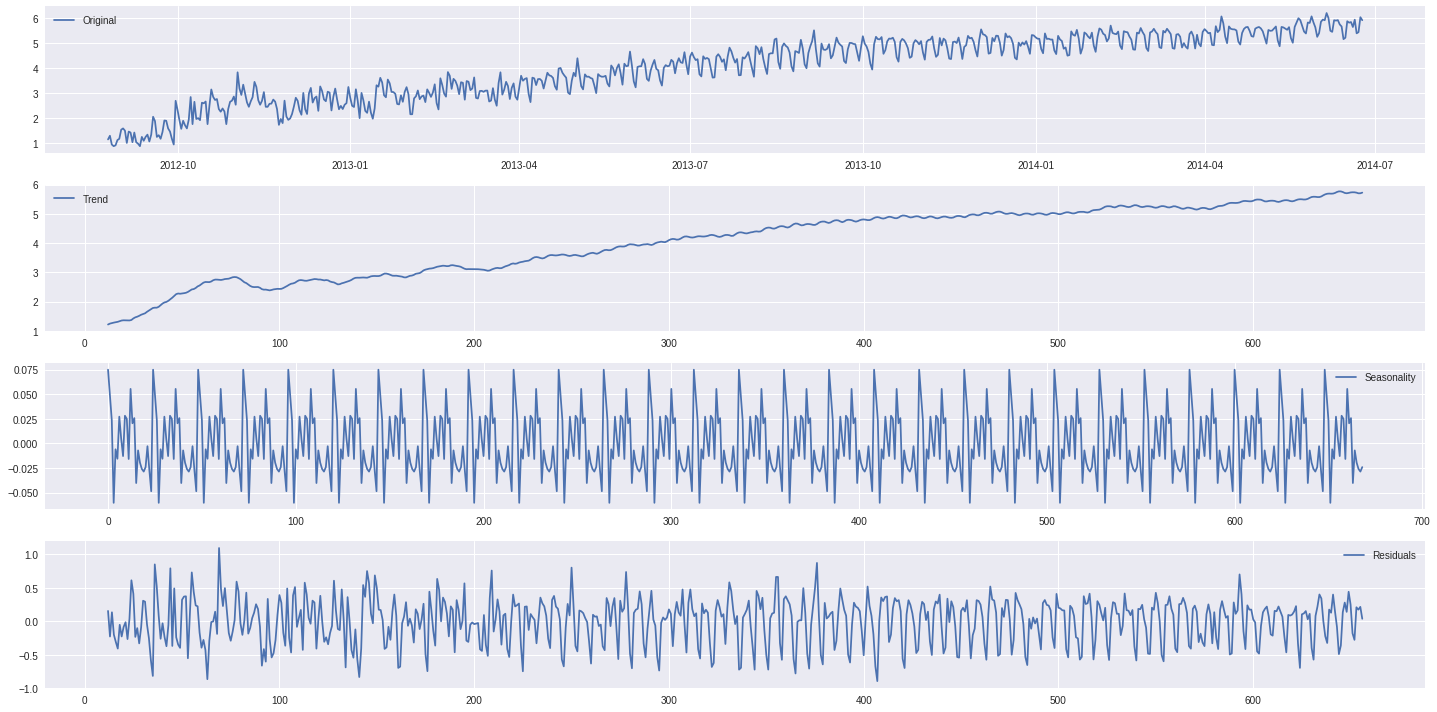

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.**

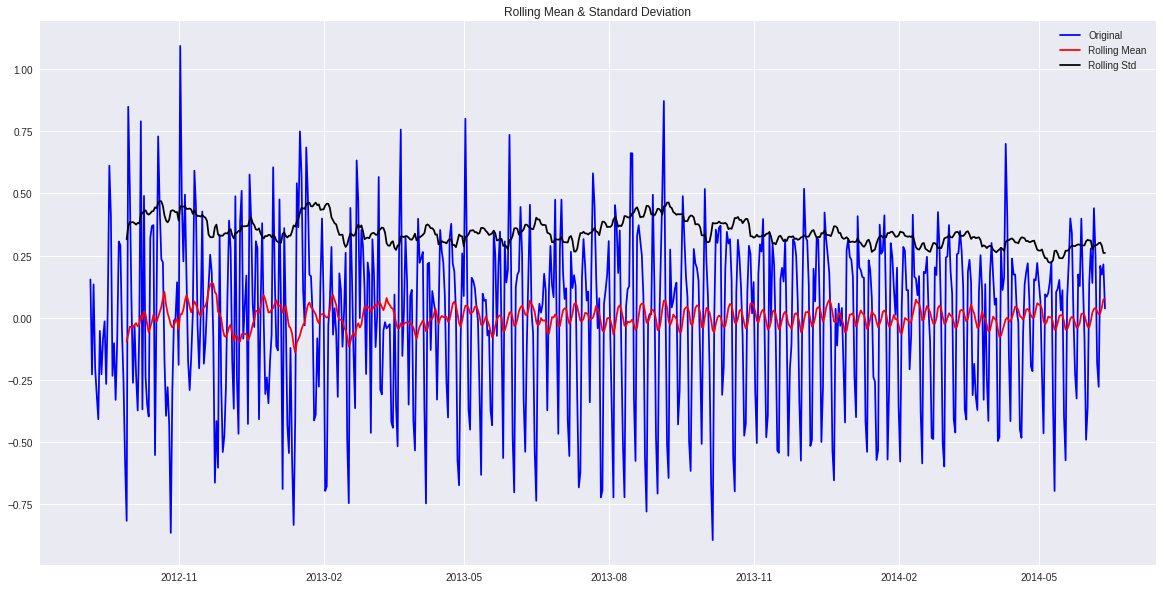

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [62]:
# Stationarity of residuals
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

**It can be interpreted from the results that the residuals are stationary.**

In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

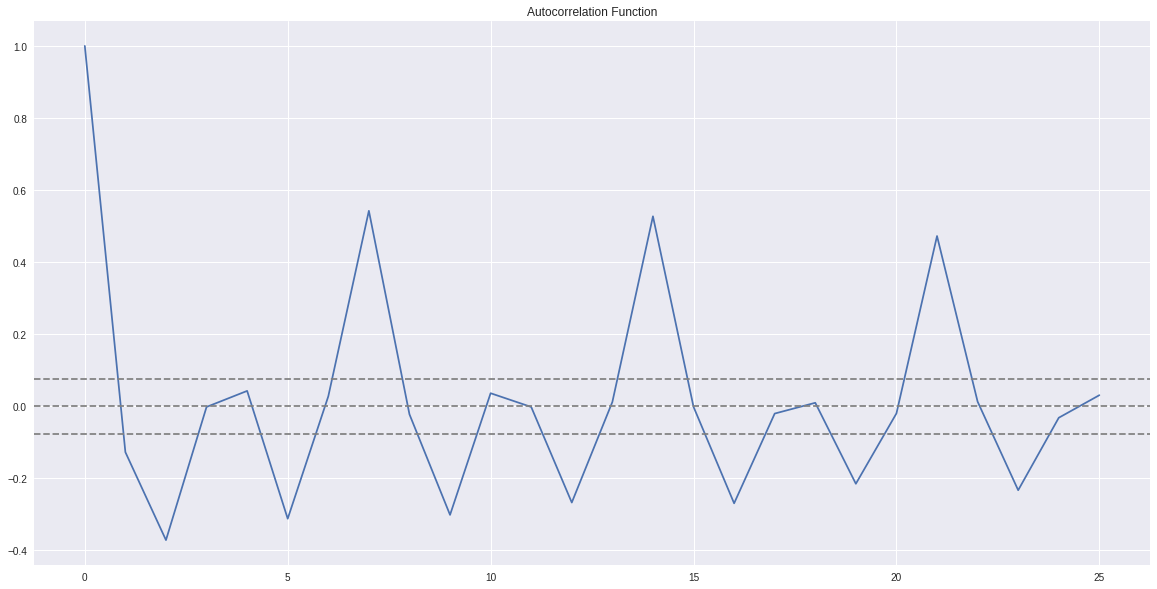

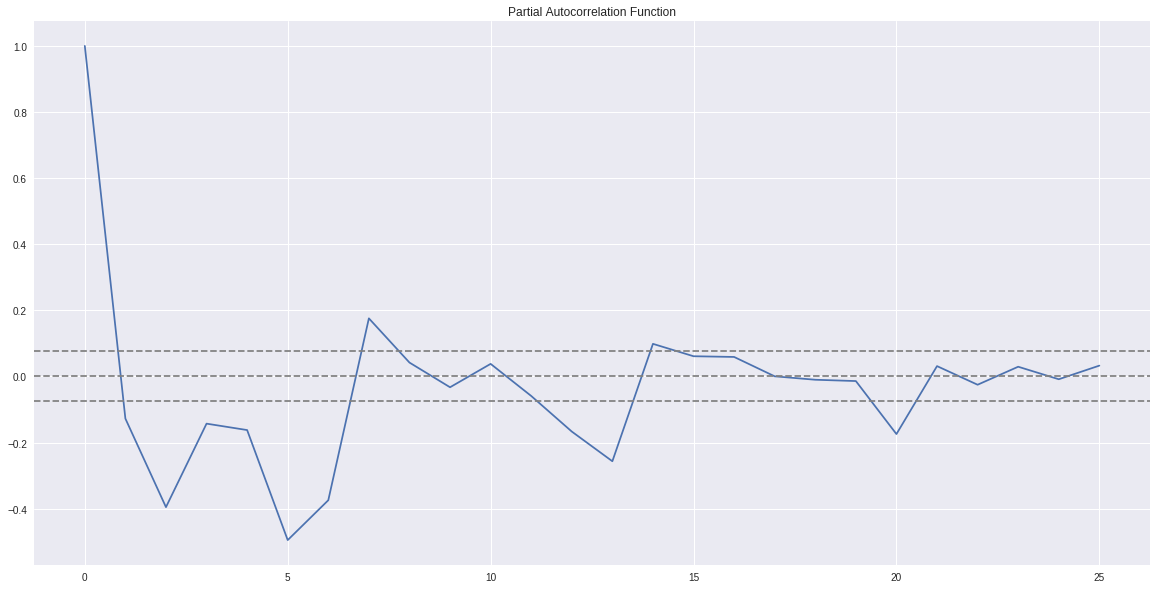

In [64]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

*   p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

*   q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

*   Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

In [0]:
# Autoregression model specifies that the output variable depends linearly on its own previous values
from statsmodels.tsa.arima_model import ARIMA

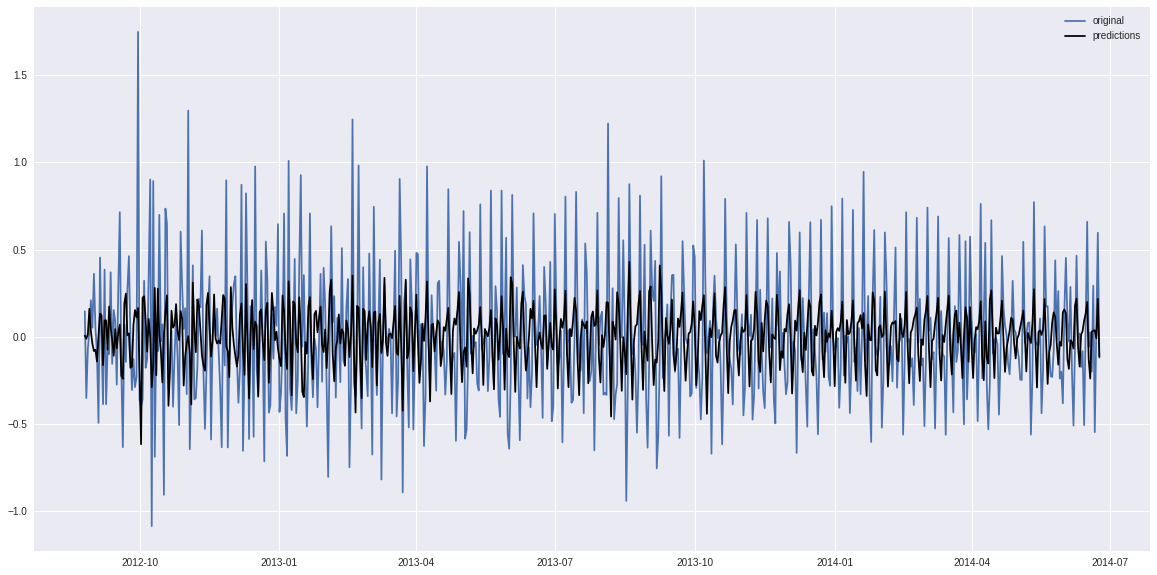

In [67]:
model = ARIMA(Train_log, order=(2, 1, 0))                              # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='black', label='predictions')
plt.legend(loc='best')
plt.show()

In [0]:
# Store the predicted results as a separate series and observe it
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

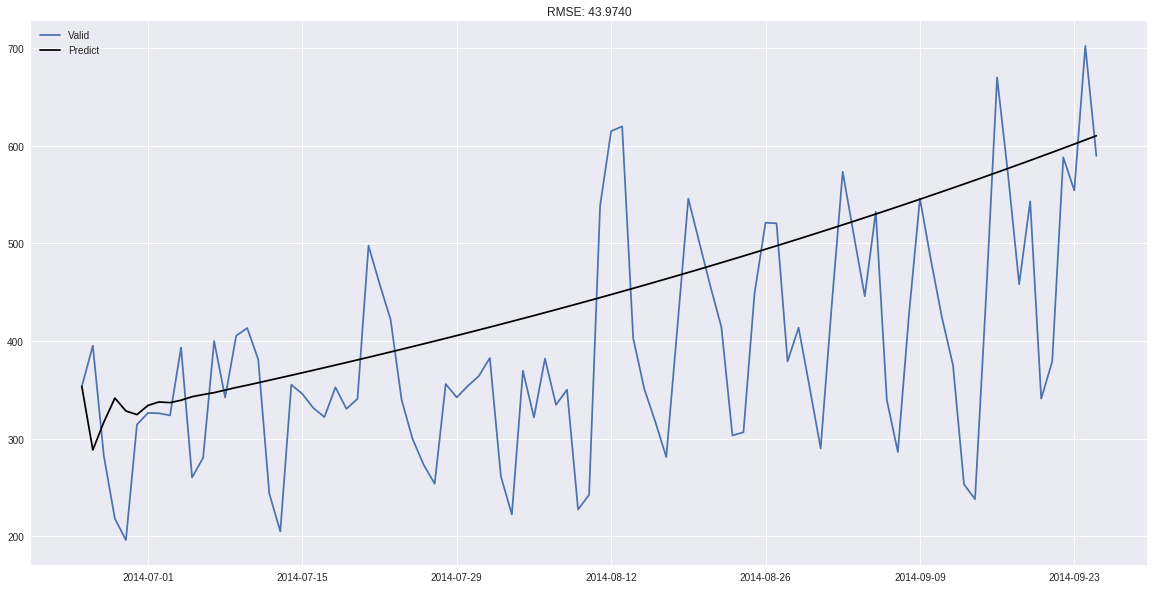

In [70]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'black', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

**Here the black line shows the prediction for the validation set. Let’s build the MA model now.**

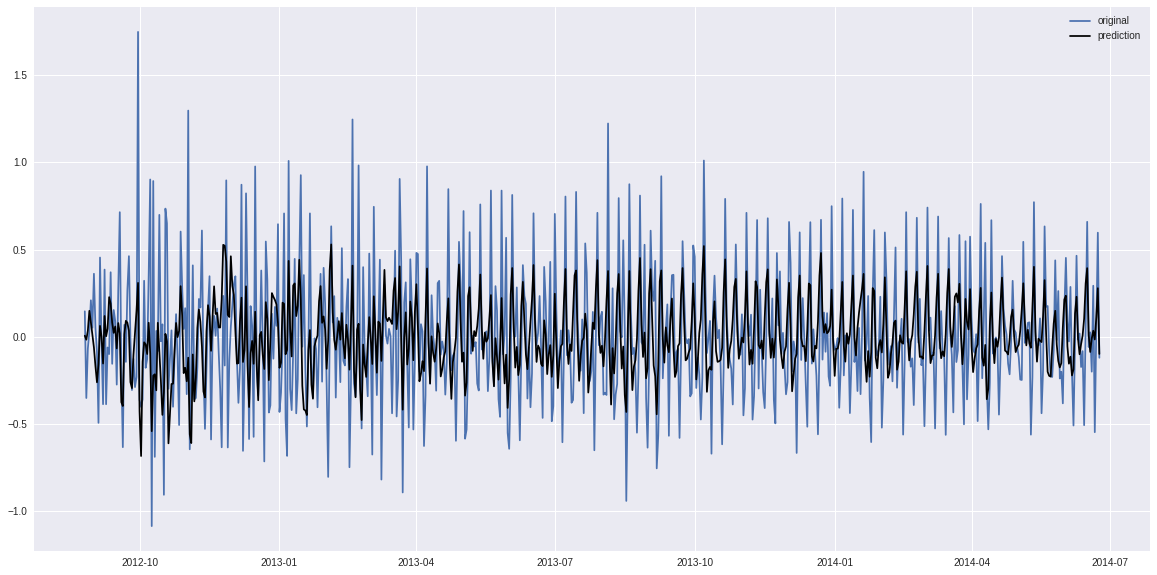

In [72]:
# Moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='black', label='prediction')
plt.legend(loc='best')
plt.show()

In [0]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

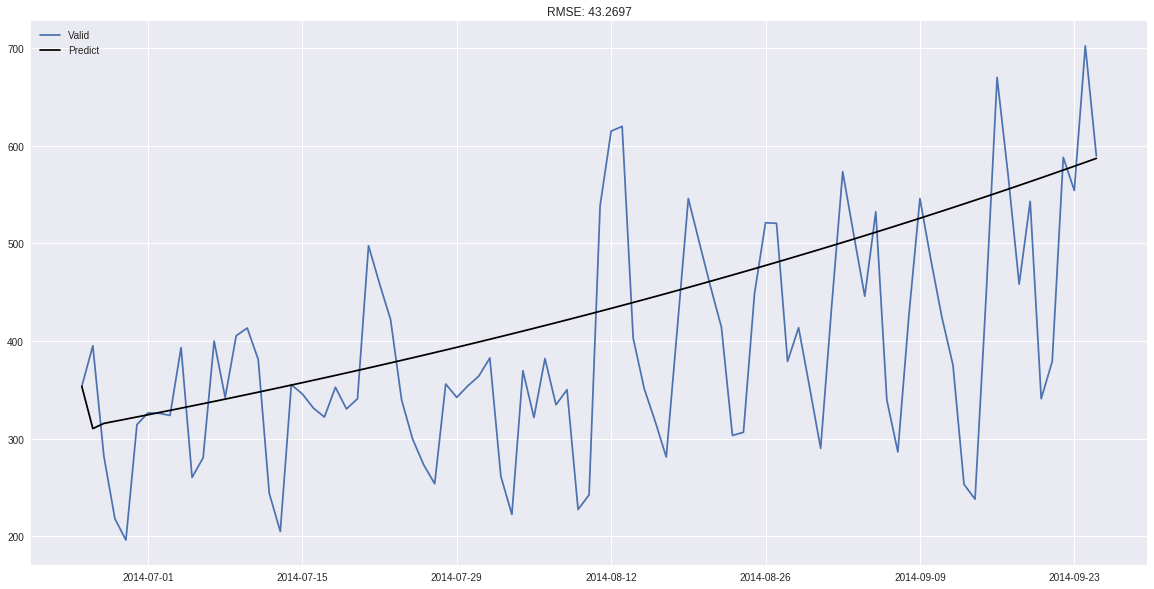

In [75]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'black', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

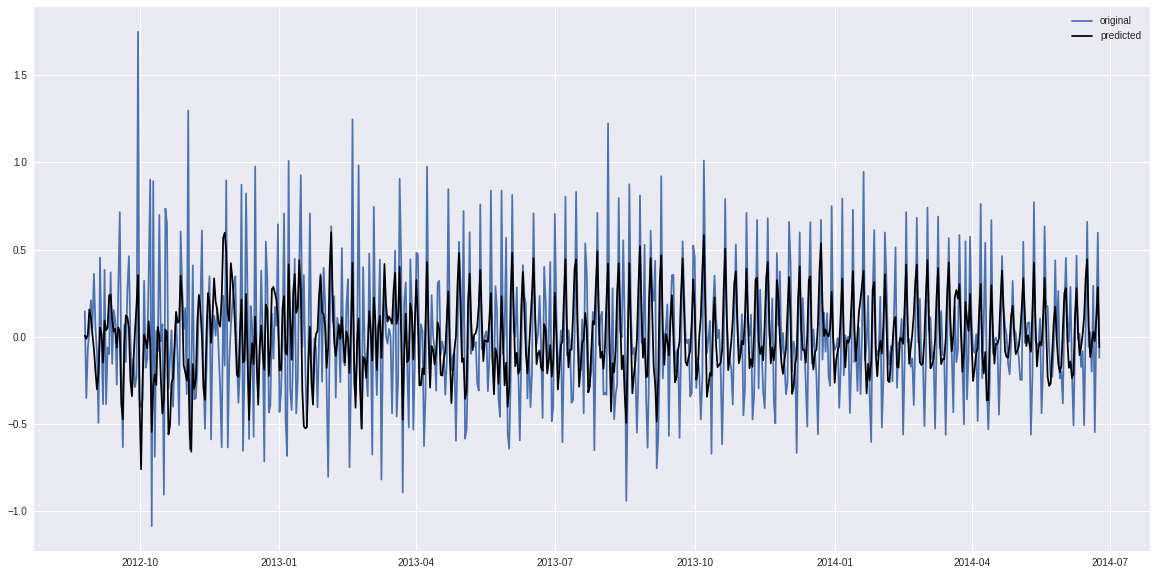

In [77]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='black', label='predicted')
plt.legend(loc='best')
plt.show()

In [0]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [0]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [0]:
# Let's predict values for validation set
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

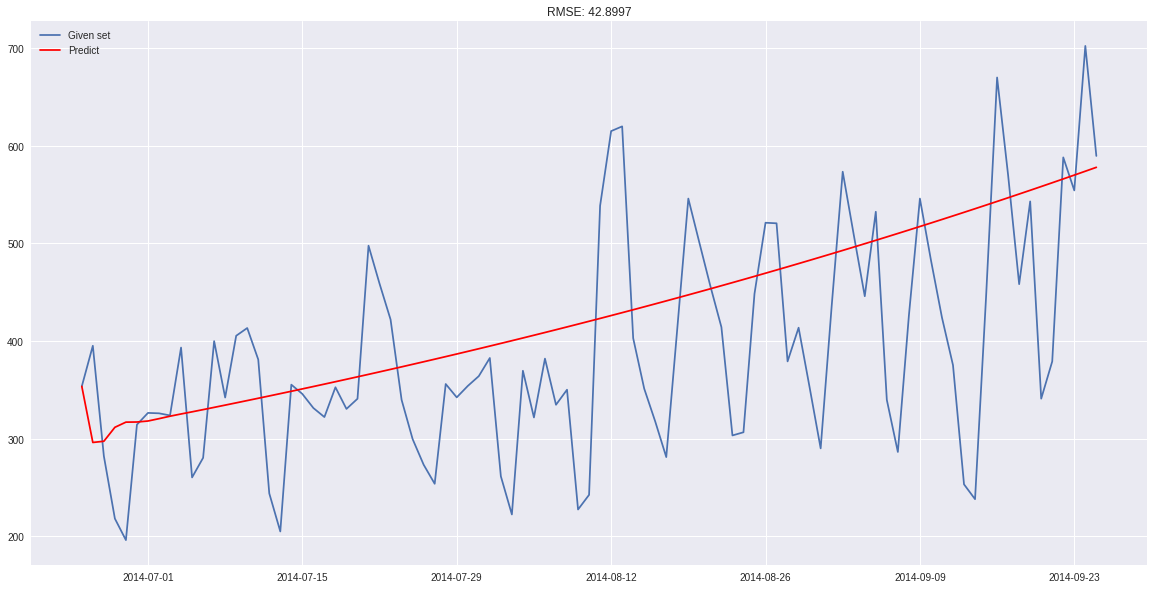

In [82]:
check_prediction_diff(ARIMA_predict_diff, valid)

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


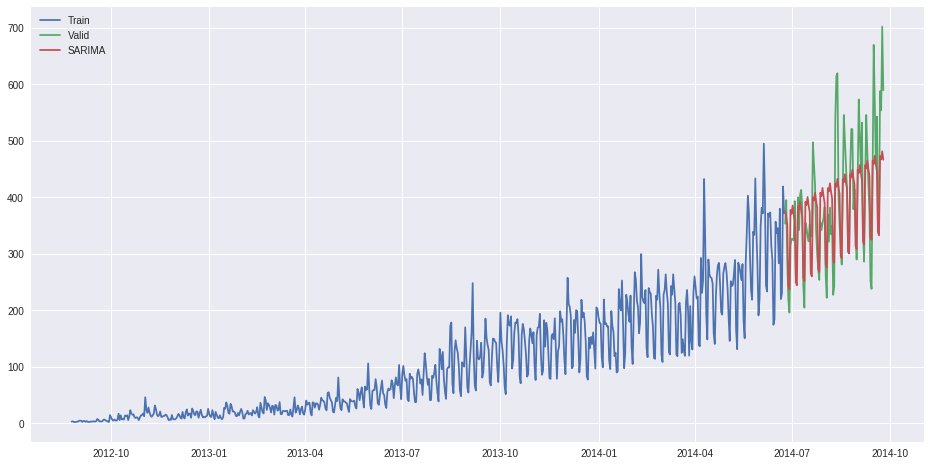

In [84]:
# SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

*   Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

*   Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

*   In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [85]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.74807361004665


In [0]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [0]:
test['prediction'] = predict

In [0]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [0]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')